<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/MetodoEuler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 01, Decamiento radioactivo
1. Resolver la siguiente ecuacion difirencial, empleando el metodo de Euler, para ello debera consultar en una inteligencia artificial el metodo de Euler, también deberá generar el código en markdown con la explicación del método y las deducciones.

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}


1. Intervalo de tiempo para la integración
2. Paso tiempo para realizar la integración
3. Función f(t,y )
4. Construir una funcion, que permita realizar la evolución temporal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# 1. Camino para definir el delta de T, en funcion de tiempo
# Condiciones iniciales
#=========================
ta = 0.
tb = 100.
dt = 0.01
y0 = 100. # Condiciones inicial
λ = 0.1 # Constante de decaimiento
#=========================
NumT=int((tb-ta)/dt)
# El intervalo temporal de integracion
t = np.linspace(ta, tb, NumT)

def f(t, y, λ):
    return -λ*y

def evolve(f, numT,y0, deltaT, λ):
  y = np.zeros(NumT)
  y[0] = y0
  for i in range(1, NumT):
    y[i] = y[i-1] + deltaT*f(t[i-1], y[i-1], λ)
  return y

Mounted at /content/drive


In [ ]:
def euler(ta,tb,dt,y0,λ):
  NumT=int((tb-ta)/dt)
  t = np.linspace(ta, tb, NumT)
  y = evolve(f, NumT,y0, dt, λ)
  return y

In [ ]:
λ1=0.1
λ2=0.3
L = [λ1, λ2]
y1 = euler(ta, tb, dt, y0 , λ=L[0])
y2 = euler(ta, tb, dt, y0 , λ=L[1])

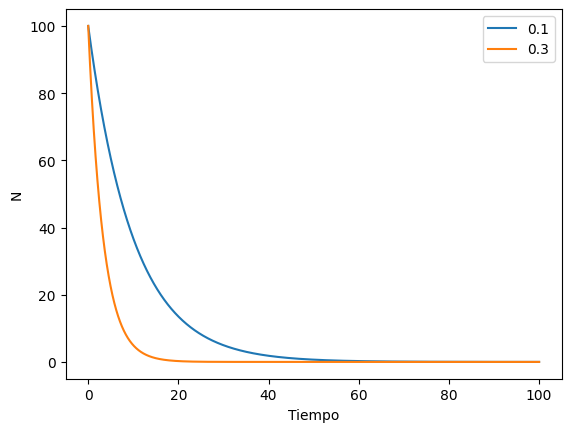

In [ ]:
plt.plot(t, y1, label=f"{L[0]}")
plt.plot(t, y2, label=f"{L[1]}")
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("N")
plt.show()

In [ ]:
path="/content/drive/MyDrive/Docencia/tmp"
name="euler.txt"
np.savetxt(f"{path}/{name}", np.column_stack((t, y1, y2)))

# Actividad : Caida de un paracaidista.

Disenar un programa que permita encontrar la posición y velocidad como función del tiempo para estudiar el movimiento de un paracaidista que desciende desde una altura h.



Para su estudio emplea el metodo de euler, ten presente las siguientes consideraciones para el modelo:


\begin{align*}
    \sum F_y &= ma \\
    mg - f_s &= ma \\
    \frac{d^2 y}{dt^2} + \frac{b}{m}\frac{dy}{dt} + g &= 0
\end{align*}


reescriendo



Con el metodo de euler construyamos dos ecuaciones diferenciales de primer orden:

\begin{align*}
    \frac{dy}{dt} &= v =f(t, y)
\end{align*}


\begin{align*}
    \frac{dv}{dt} &= -g-\frac{b}{m} v = h(t, y, v )
\end{align*}



In [ ]:
import numpy as np
import matplotlib.pylab as plt
# Condiciones iniciales
#=======================
y0 = 2000 #metros
v0 = 1E-10
b = 10.0
m = 70  #kg
#=======================
params = (b, m, g)
dt = 0.1
ta = 0
tb = 20
N = int((tb-ta)/dt)

time = np.linspace(ta, tb, N)
y = np.zeros(N)
v = np.zeros(N)
y[0] = y0
v[0] = v0

for i in range(0, N-1):
  y[i+1] = y[i] + dt*v[i]
  v[i+1] = v[i] - dt*(g+b/m*v[i])


Text(0, 0.5, 'v(m/s)')

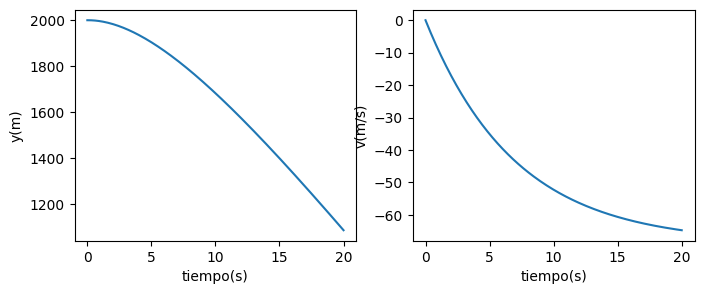

In [ ]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax=axs.flatten()
ax[0].plot(time, y)
ax[0].set_xlabel("tiempo(s)")
ax[0].set_ylabel("y(m)")
ax[1].plot(time, v)
ax[1].set_xlabel("tiempo(s)")
ax[1].set_ylabel("v(m/s)")



\begin{align*}
    \sum F_y &= ma \\
    mg - f_s &= ma \\
    \frac{d^2 y}{dt^2} + \frac{b}{m}\frac{dy}{dt} + g &= 0
\end{align*}


reesbicriendo



Con el metodo de euler construyamos dos ecuaciones diferenciales de primer orden:

\begin{align*}
    \frac{dy}{dt} &= v =f(t, y)
\end{align*}


\begin{align*}
    \frac{dv}{dt} &= -g-\frac{b}{m} v = h(t, y, v )
\end{align*}

---------------------

\begin{align*}
    \frac{dy}{dt} &= v\\
    \frac{dv}{dt} &= -g-\frac{b}{m} v \\
\end{align*}


In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
# Condiciones iniciales
#=======================



def fun(U, t,params):
  b = params[0]
  m = params[1]
  g = params[2]
  dU0dt = U[1]# v
  dU1dt =  -g - b/m * U[1]
  dUdt = np.array([dU0dt, dU1dt])
  return dUdt

def euler(y0, v0, ta, tb, dt, params):

  N = int((tb-ta)/dt)
  time = np.linspace(ta, tb, N)

  U = np.zeros((N, 2 ))
  U[0] = np.array([y0, v0])

  for i in range(0, N-1):
    U[i+1] = U[i] + dt*fun(U[i],i, params)
  return U

In [ ]:
y0 = 5000 #metros
v0 = 1E-10
b = 10.0
m = 70  #kg
#=======================
params = (b, m, g)
dt = 0.1
ta = 0
tb = 20
params = (b, m, g)

U = euler(y0=y0, v0=v0, ta=ta, tb=tb, dt=dt, params=params)
y = U[:,0]
v = U[:,1]

# Empleando odeint
yinicial = np.array([y0, v0])

Text(0, 0.5, 'v(m/s)')

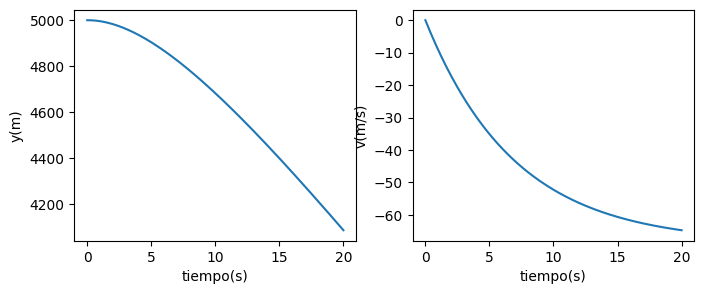

In [ ]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax=axs.flatten()
ax[0].plot(time, y)
ax[0].set_xlabel("tiempo(s)")
ax[0].set_ylabel("y(m)")
ax[1].plot(time, v)
ax[1].set_xlabel("tiempo(s)")
ax[1].set_ylabel("v(m/s)")
